<a href="https://colab.research.google.com/github/archipelagoing/NotepadSharp/blob/main/n_sharp_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tesseract Gaming
failure :(

In [1]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,592 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [2]:
!pip install pytesseract

In [10]:
from PIL import Image

import pytesseract

# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'/usr/local/bin/pytesseract'
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

# Simple image to string
#print(pytesseract.image_to_string(Image.open('test.png')))

# In order to bypass the image conversions of pytesseract, just use relative or absolute image path
# NOTE: In this case you should provide tesseract supported images or tesseract will return error
#print(pytesseract.image_to_string('test.png'))

# List of available languages
#print(pytesseract.get_lanprojectsnfig=''))

# French text image to string
print(pytesseract.image_to_string(Image.open('test.jpg'), lang='fra'))

# Batch processing with a single file containing the list of multiple image file paths
print(pytesseract.image_to_string('images.txt'))

# Timeout/terminate the tesseract job after a period of time
try:
    print(pytesseract.image_to_string('test.jpg', timeout=2)) # Timeout after 2 seconds
    print(pytesseract.image_to_string('test.jpg', timeout=0.5)) # Timeout after half a second
except RuntimeError as timeout_error:
    # Tesseract processing is terminated
    pass

# Get bounding box estimates
print(pytesseract.image_to_boxes(Image.open('test.png')))

# Get verbose data including boxes, confidences, line and page numbers
print(pytesseract.image_to_data(Image.open('test.png')))

# Get information about orientation and script detection
print(pytesseract.image_to_osd(Image.open('test.png')))

# Get a searchable PDF
pdf = pytesseract.image_to_pdf_or_hocr('test.png', extension='pdf')
with open('test.pdf', 'w+b') as f:
    f.write(pdf) # pdf type is bytes by default

# Get HOCR output
hocr = pytesseract.image_to_pdf_or_hocr('test.png', extension='hocr')

# Get ALTO XML output
xml = pytesseract.image_to_alto_xml('test.png')

# getting multiple types of output with one call to save compute time
# currently supports mix and match of the following: txt, pdf, hocr, box, tsv
text, boxes = pytesseract.run_and_get_multiple_output('test.png', extensions=['txt', 'box'])

TesseractError: (2, 'Usage: pytesseract [-l lang] input_file')

In [4]:
from PIL import Image

import pytesseract

# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'
# Example tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract'

# Simple image to string
print(pytesseract.image_to_string(Image.open('pee.jpg')))

Che TviCK Fox didnt, are the Sag



# TROCR Gameplay
we'll see

In [5]:
!pip install -q transformers

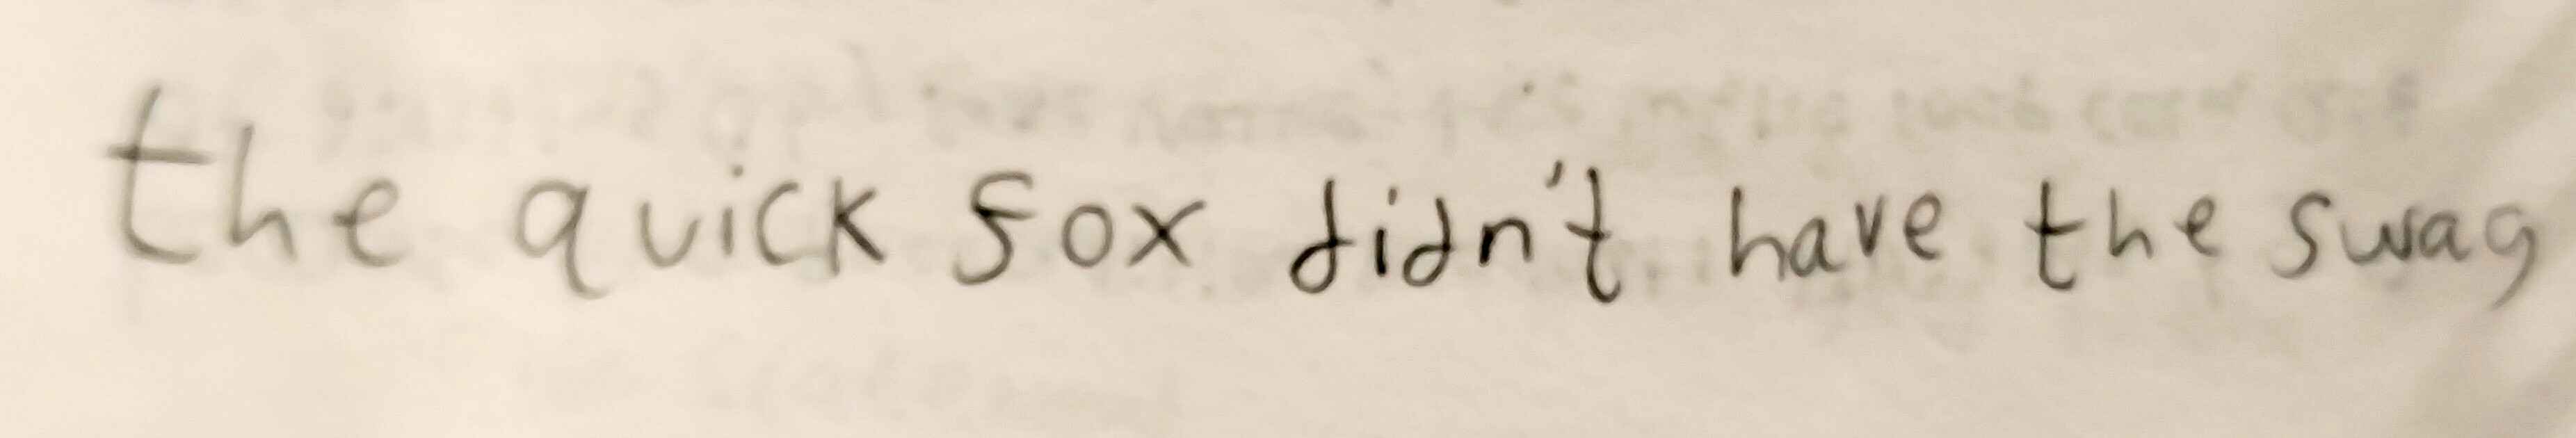

In [6]:
from PIL import Image

image = Image.open("pee.jpg").convert("RGB")
image

In [7]:
# prepare image for model
from transformers import TrOCRProcessor

processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
# calling the processor is equivalent to calling the feature extractor
pixel_values = processor(image, return_tensors="pt").pixel_values
print(pixel_values.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

torch.Size([1, 3, 384, 384])


In [8]:
from transformers import VisionEncoderDecoderModel

model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [9]:
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

the quick box didn't have the song


In [1]:
# !pip install -q transformers
from transformers import TrOCRProcessor
from transformers import VisionEncoderDecoderModel
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.47.1"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [3]:
from PIL import Image
from transformers import TrOCRProcessor
from transformers import VisionEncoderDecoderModel
import sys

# grabbing arguments
args = []
for line in sys.stdin:
    line.rstrip()
    args.append(line)

# defailt image
if (len(args) == 0):
  args.append("pee.jpg")

image = Image.open(args[0]).convert("RGB")

# model & processor loaded from different script
pixel_values = processor(image, return_tensors="pt").pixel_values

# generate ids and text
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

torch.Size([1, 3, 384, 384])
the quick box didn't have the song


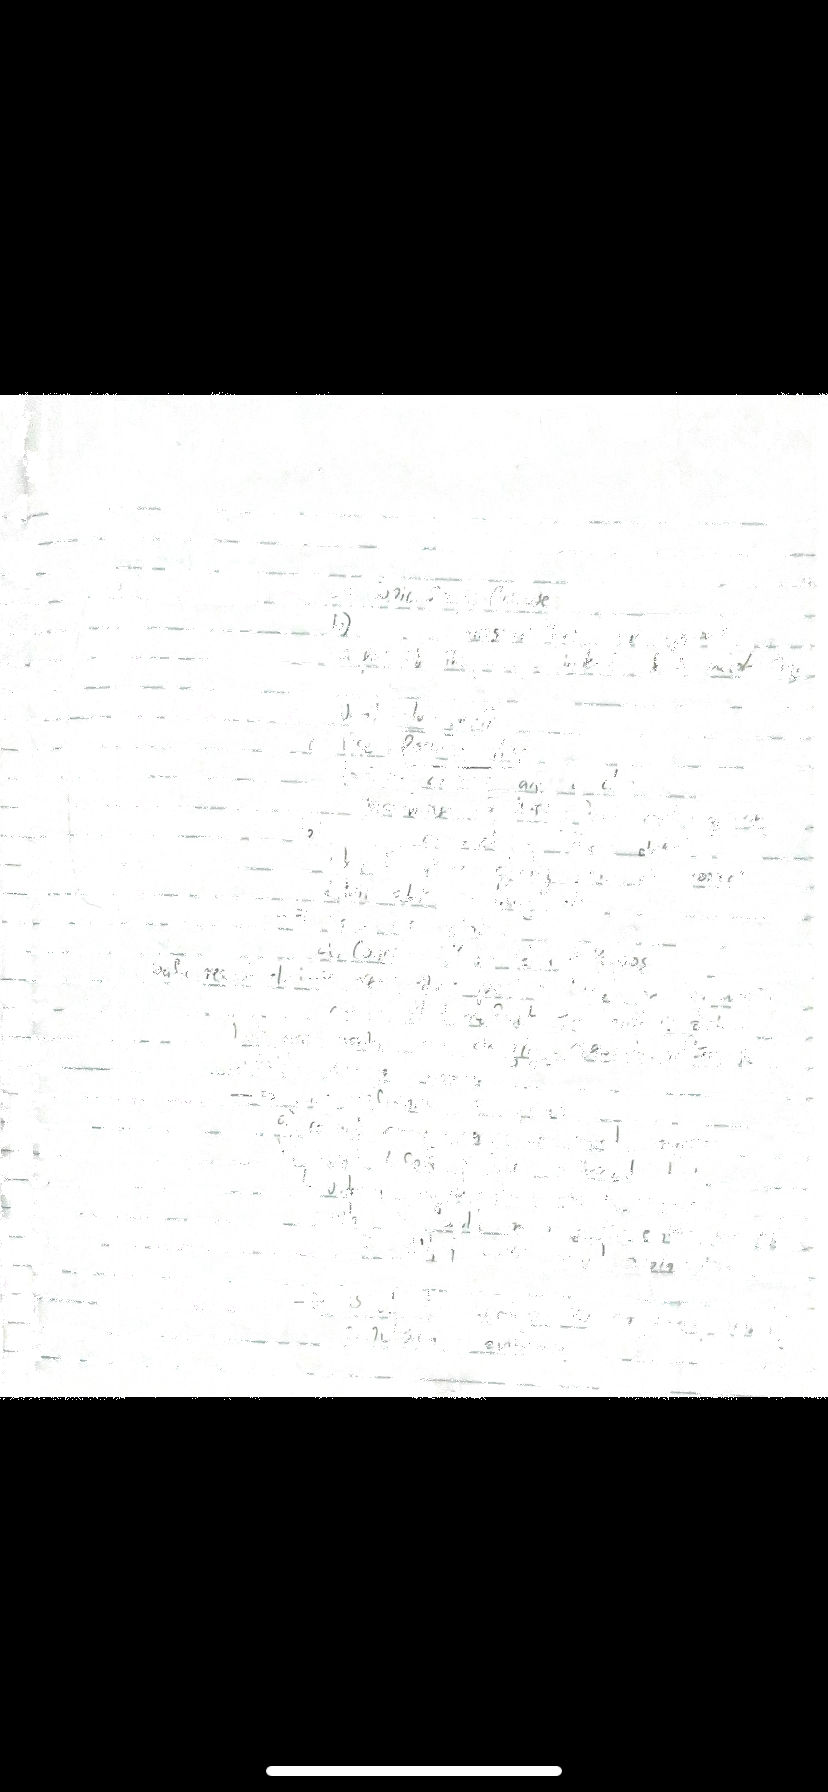

In [47]:
# prompt: make me a function in pil that detects red or blue pixels by checking if the red or blue channel is higher than both of the other respective channels and replaces it with a white pixel in the rgb color space

from PIL import Image

def replace_rb_with_white(image_path):
  """
  Detects red or blue pixels in an image and replaces them with white pixels.

  Args:
    image_path: The path to the input image.

  Returns:
    A PIL Image object with red and blue pixels replaced by white pixels.
  """
  img = Image.open(image_path).convert("RGB")
  pixels = img.load()
  width, height = img.size

  for x in range(width):
    for y in range(height):
      r, g, b = pixels[x, y]
      if r > g and r > b: # Red pixel
        pixels[x, y] = (255, 255, 255) # Set to white
      elif b > r and b > g: # Blue pixel
        pixels[x, y] = (255, 255, 255) # Set to white
  return img

# Example usage:
# modified_img = replace_rb_with_white("test.jpg")
# modified_img.save("modified_test.jpg")
replace_rb_with_white("step3.jpeg")


In [26]:
import cv2

def remove_lines_with_inpainting(image_path, output_path="output_inpainted.png"):
    """Remove lines using inpainting to restore handwriting."""

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 8)

    # Create horizontal line mask
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 1))
    detected_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

    # Inpainting (restores missing handwriting pixels)
    inpainted = cv2.inpaint(image, detected_lines, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

    # Save & display results
    cv2.imwrite(output_path, inpainted)
    #cv2.imshow("Original", image)
    #cv2.imshow("Inpainted", inpainted)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

# Example Usage
remove_lines_with_inpainting("step3.jpeg")

In [34]:
import cv2
import numpy as np

# Open the image.
img = cv2.imread('step3.jpeg')

# Trying 4 gamma values.
for gamma in [0.1, 0.3, 0.5, 1.2, 2.2]:

	# Apply gamma correction.
	gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

	# Save edited images.
	cv2.imwrite('gamma_transformed'+str(gamma)+'.jpg', gamma_corrected)


In [27]:
from PIL import Image

image = Image.open("output_inpainted.png")
image = remove_lines_with_inpainting("output_inpainted.png")
image

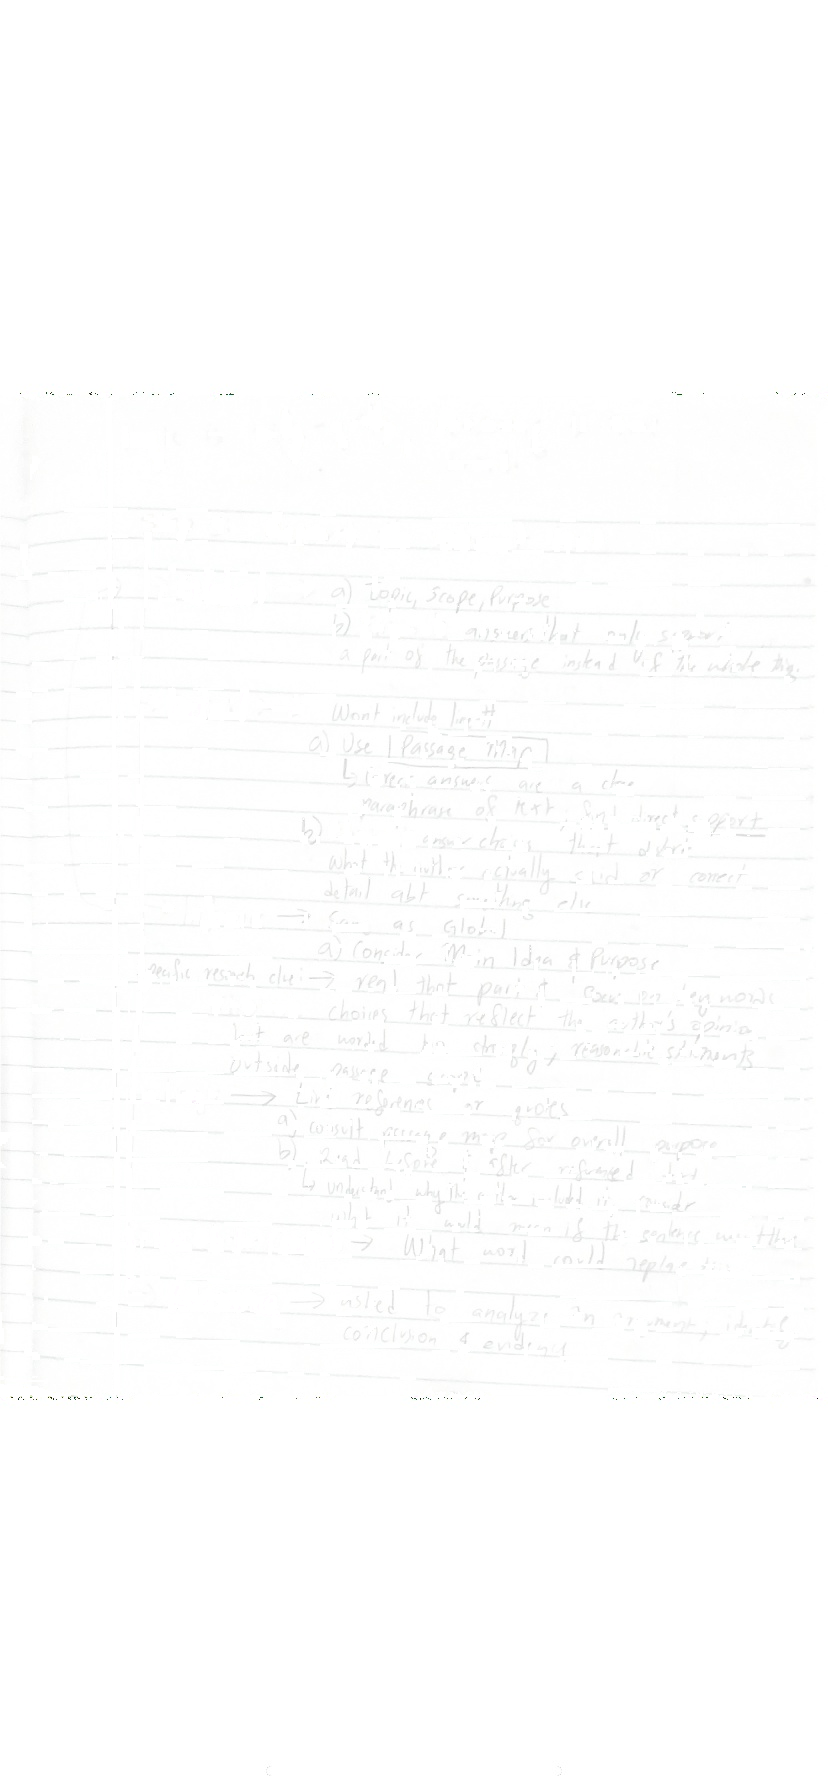

In [51]:
import cv2
import numpy as np
from PIL import Image

# open image and change gamma
img = cv2.imread('step3.jpeg')
gamma = 0.17
gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

# Convert the image to HSV color space
hsv = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for dark colors (adjust these values as needed)
lower_dark = np.array([0, 0, 0])
upper_dark = np.array([210, 210, 210])

# Create a mask for dark colors
mask = cv2.inRange(hsv, lower_dark, upper_dark)

# Invert the mask to select non-dark regions
mask_inv = cv2.bitwise_not(mask)

# Use the mask to set the dark pixels to white
gamma_corrected[mask == 255] = (255, 255, 255)

rgb = cv2.cvtColor(gamma_corrected, cv2.COLOR_HSV2RGB)

nu_gamma = 5
final = np.array(255*(rgb / 255) ** nu_gamma, dtype = 'uint8')

# Save the resulting image
cv2.imwrite('final_image.jpg', gamma_corrected)
img = replace_rb_with_white("final_image.jpg")
pixels = img.load()
width, height = img.size

for x in range(width):
  for y in range(height):
    r, g, b = pixels[x, y]
    if r > g and r > b: # Red pixel
      pixels[x, y] = (255, 255, 255) # Set to white
    elif b > r and b > g: # Blue pixel
      pixels[x, y] = (0, 0, 0) # Set to white
img